### 1. 데이터셋

In [3]:
%run C:\Users\Hss\dd.py

In [4]:
import mglearn

X.shape (26, 2)


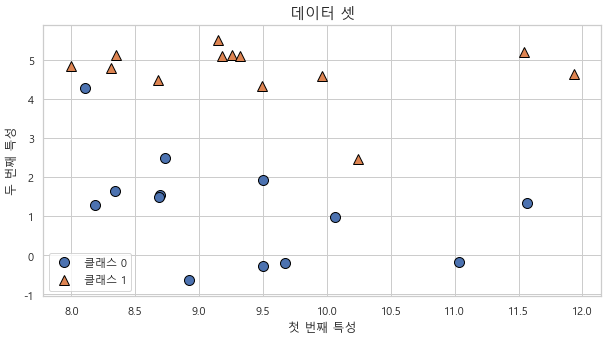

In [12]:
# 데이터 셋 생성
X, y = mglearn.datasets.make_forge()

# 산점도
plt.figure(figsize = (10,5))
mglearn.discrete_scatter(X[:,0], X[:, 1], y)

plt.title("데이터 셋", fontsize = 15)
plt.legend(["클래스 0", "클래스 1"], loc = 0)
plt.xlabel("첫 번째 특성")
plt.ylabel("두 번째 특성")

print("X.shape {}".format(X.shape))

Text(0,0.5,'타겟')

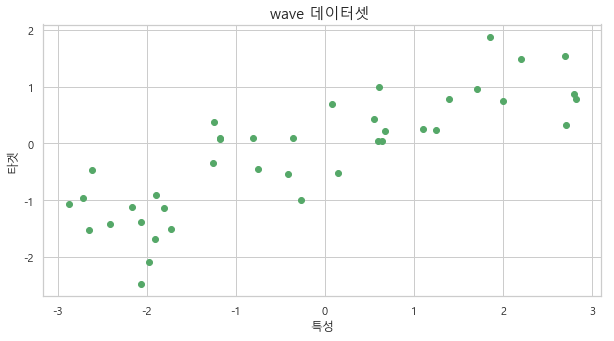

In [23]:
#wave 데이터셋

plt.figure(figsize = (10,5))
plt.title("wave 데이터셋 ", fontsize = 15)
X, y = mglearn.datasets.make_wave(n_samples = 40)
plt.plot(X, y, 'go')
plt.xlabel("특성")
plt.ylabel("타겟")




In [31]:

#유방암 데이터 셋

from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print(cancer.DESCR)
print('\n')
print('Feature names: \n', cancer.feature_names)
print('\n')
print('Target names: \n', cancer.target_names)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [100]:
pd_cancer = pd.DataFrame(cancer.data)
pd_cancer.columns = cancer.feature_names
pd_cancer['result'] = cancer.target

In [41]:
pd_cancer.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,result
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1


- ### KNN 알고리즘

    - 가장 간단하다. (훈련 데이터셋을 저장하는 것이 모델을 만드는 과정 -> 학습이 없다)
    - 추가된 데이터와 가장 가까운 데이터를 참조하여 예측하는 방식
        

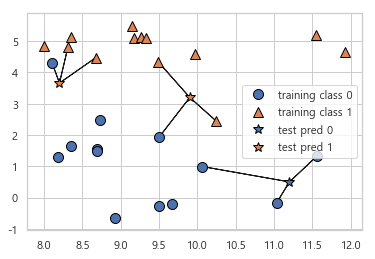

In [45]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [53]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 13)
X_train.shape

(19, 2)

In [63]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors = 3)
clf.fit(X_train, y_train)

print(clf.predict(X_test), y_test)
print("테스트 정확도 {:.2f}".format(clf.score(X_test, y_test)))

[1 1 0 0 1 0 0] [1 1 0 1 1 0 0]
테스트 정확도 0.86


- ###  결정경계 그리기
    - 이웃을 늘릴 수록 결정 경계는 부드러워진다 -> 단순한 모델이 된다.
    - 극단적으로 이웃 수가 데이터셋의 수와 같아지면 모든 데이터를 참조하므로 가장 많은 class가 예측값이 된다.
    

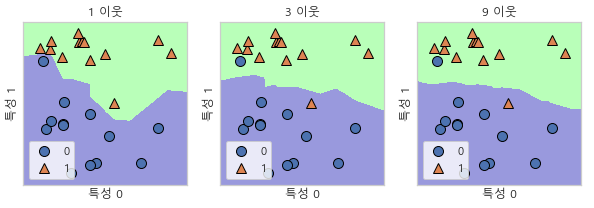

In [82]:
fig, axes = plt.subplots(1, 3, figsize = (10,3))

for n_neighbors, ax in zip([1,3,9], axes):
    clf = KNeighborsClassifier(n_neighbors= n_neighbors).fit(X,y)
    mglearn.plots.plot_2d_classification(clf, X, fill = True, eps = 0.5, ax = ax, alpha = .4)
    mglearn.discrete_scatter(X[:,0], X[:,1], y, ax = ax)
    ax.set_title('{} 이웃'.format(n_neighbors))
    ax.set_xlabel('특성 0')
    ax.set_ylabel('특성 1')
    ax.legend(loc = 3)
plt.show()

- ### [의문] 모델 복잡도와 일반화 성능의 관계

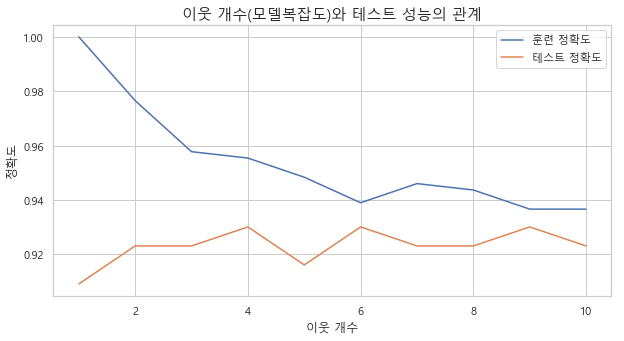

In [108]:
X_train, X_test, y_train, y_test = train_test_split(pd_cancer[cancer.feature_names], \
                                                    pd_cancer['result'], stratify = pd_cancer['result'], random_state = 13)

train_accuracy = []
test_accuracy = []

neighbors = range(1,11)

for n in neighbors:
    clf = KNeighborsClassifier(n_neighbors= n)
    clf.fit(X_train, y_train)
    train_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))

    
plt.figure(figsize = (10,5))
plt.title("이웃 개수(모델복잡도)와 테스트 성능의 관계", fontsize = 15)
plt.plot(neighbors, train_accuracy, label = '훈련 정확도')
plt.plot(neighbors, test_accuracy, label = '테스트 정확도')
plt.xlabel('이웃 개수')
plt.ylabel('정확도')
plt.legend()
plt.show()

- ### K-최근접 이웃 회귀
        - 분류 뿐 아니라 회귀 분석에도 쓰인다.
        - 가까운 데이터들의 평균으로 예측한다.
        

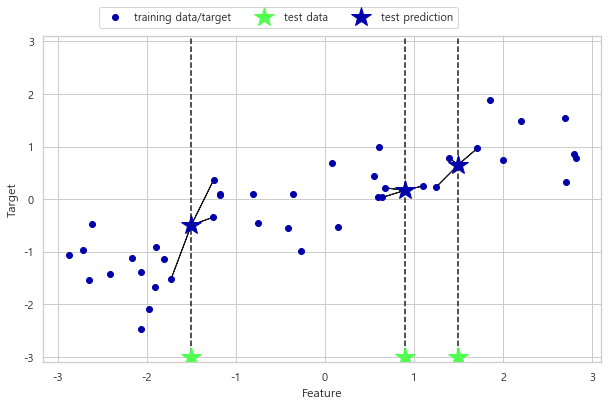

In [110]:
mglearn.plots.plot_knn_regression(n_neighbors= 3)

In [146]:
from sklearn.neighbors import KNeighborsRegressor



model = KNeighborsRegressor(n_neighbors = 1)
model.fit(X_train, y_train)

print("테스트 R^2: {:.2f}".format(model.score(X_test, y_test)))


테스트 R^2: 0.29


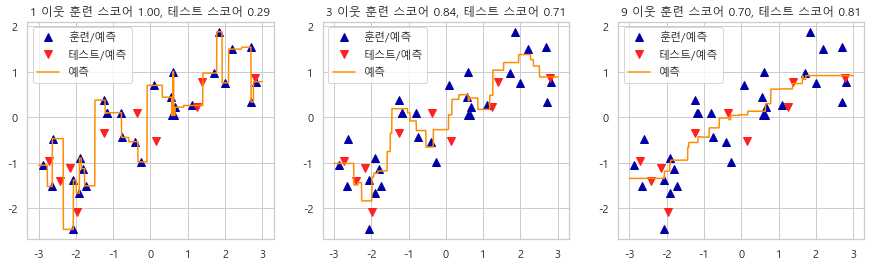

In [151]:
fig, axes = plt.subplots(1, 3, figsize = (15,4))
line = np.linspace(-3, 3, 1000).reshape(-1,1)

X, y = mglearn.datasets.make_wave(n_samples = 40)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 88)

for n_neighbors, ax in zip([1,3,9], axes):
    model = KNeighborsRegressor(n_neighbors= n_neighbors).fit(X_train,y_train)

    ax.set_title('{} 이웃 훈련 스코어 {:.2f}, 테스트 스코어 {:.2f}'.format(n_neighbors, \
                                                              model.score(X_train, y_train), \
                                                              model.score(X_test, y_test)))
    
    ax.plot(X_train, y_train, '^', c = mglearn.cm2(0), markersize = 8)
    ax.plot(X_test, y_test, 'v', c = mglearn.cm2(1), markersize = 8)
    ax.plot(line, model.predict(line), c = 'darkorange')
    
    ax.legend(['훈련/예측', '테스트/예측', '예측'])

plt.show()